In [1]:
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [4]:
## Data Gathering and Assessment

In [2]:
#save filepath to a variable for easy assess
HR_Analytics_path = "C:/Users/obyaj/.jupyter/HR_Analytics.csv.csv"
#read and store the data in dataframe titlted HR-Analytics_data
HR_Analytics_data = pd.read_csv(HR_Analytics_path)
#print the first five rows of the data
HR_Analytics_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#Get the information about the rows, columns, null values of the data
HR_Analytics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#Get the statistical information about the data
HR_Analytics_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#Get the names of the columns contained in the data
HR_Analytics_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
#percentage of missing values per column
HR_Analytics_data.isnull().sum()/HR_Analytics_data.shape[0] *100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [10]:
#Outline the number of rows and columns the data has
HR_Analytics_data.shape

(1470, 35)

In [11]:
#Get the number of rows and columns the data has [0 = gives the number of rows]
HR_Analytics_data.shape[0]

1470

In [12]:
#Get the number of columns the data has [1 = gives the number of columns]
HR_Analytics_data.shape[1]

35

In [13]:
#Check for duplicated values
HR_Analytics_data.duplicated().any()

False

In [14]:
#Check the type of structure of your data
HR_Analytics_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [15]:
## Exploratory Data Analysis

In [16]:
#Get the unique values in a column
HR_Analytics_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
#Get the number of unique values in a column
HR_Analytics_data['Gender'].nunique()

2

In [18]:
#Get the number of unique values in a column
HR_Analytics_data['Department'].nunique()

3

In [19]:
#Get the number of unique values in a column
HR_Analytics_data['EducationField'].nunique()

6

In [28]:
#Get the number of unique values in a column
HR_Analytics_data['Age'].nunique()

43

In [20]:
#Get the number of unique values in a column
HR_Analytics_data['RelationshipSatisfaction'].nunique()

4

In [39]:
#Get the number of unique values in a column
HR_Analytics_data['YearsSinceLastPromotion'].nunique()

16

In [71]:
#Get the number of unique values in a column
HR_Analytics_data['Attrition'].nunique()

2

In [72]:
#Get the number of unique values in a column
HR_Analytics_data['JobRole'].nunique()

9

In [46]:
#Get the number of unique values in a column
HR_Analytics_data['HourlyRate'].nunique()

71

In [74]:
#Get the number of unique values in a column
HR_Analytics_data['OverTime'].nunique()

2

In [21]:
#Get the count of unique values in a column
HR_Analytics_data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [22]:
#Get the count of unique values in a column
HR_Analytics_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [23]:
#Get the count of unique values in a column
HR_Analytics_data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [69]:
#Get the count of unique values in a column
HR_Analytics_data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [70]:
#Get the count of unique values in a column
HR_Analytics_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [24]:
#Get the count of unique values in a column
HR_Analytics_data['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [38]:
#Get the count of unique values in a column
HR_Analytics_data['YearsSinceLastPromotion'].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [45]:
#Get the count of unique values in a column
HR_Analytics_data['HourlyRate'].value_counts()

66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

In [75]:
#Get the count of unique values in a column
HR_Analytics_data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [31]:
#Get the staistical distribution of an attribute
HR_Analytics_data.Age.mean(), HR_Analytics_data.Age.median(), HR_Analytics_data.Age.mode()

(36.923809523809524,
 36.0,
 0    35
 Name: Age, dtype: int64)

In [34]:
#Get the staistical distribution of an attribute
HR_Analytics_data.DistanceFromHome.mean(), HR_Analytics_data.DistanceFromHome.median(), HR_Analytics_data.DistanceFromHome.mode()

(9.19251700680272,
 7.0,
 0    2
 Name: DistanceFromHome, dtype: int64)

In [35]:
#Get the staistical distribution of an attribute
HR_Analytics_data.RelationshipSatisfaction.mean(), HR_Analytics_data.RelationshipSatisfaction.median(), HR_Analytics_data.RelationshipSatisfaction.mode()

(2.7122448979591836,
 3.0,
 0    3
 Name: RelationshipSatisfaction, dtype: int64)

In [37]:
#Get the staistical distribution of an attribute
HR_Analytics_data.YearsSinceLastPromotion.mean(), HR_Analytics_data.YearsSinceLastPromotion.median(), HR_Analytics_data.YearsSinceLastPromotion.mode()

(2.1877551020408164,
 1.0,
 0    0
 Name: YearsSinceLastPromotion, dtype: int64)

In [44]:
#Get the staistical distribution of an attribute
HR_Analytics_data.HourlyRate.mean(), HR_Analytics_data.HourlyRate.median(), HR_Analytics_data.HourlyRate.mode()

(65.89115646258503,
 66.0,
 0    66
 Name: HourlyRate, dtype: int64)

In [43]:
## Visualization

In [27]:
## Univariate Plot

<Axes: xlabel='Age', ylabel='Count'>

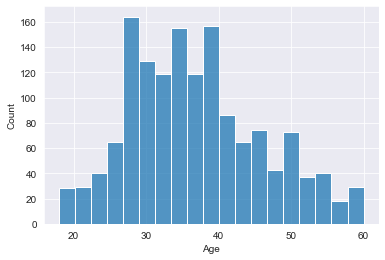

In [49]:
#A graph showing the age distribution od employees
sns.histplot(x="Age", data=HR_Analytics_data)

<Axes: xlabel='Age', ylabel='Count'>

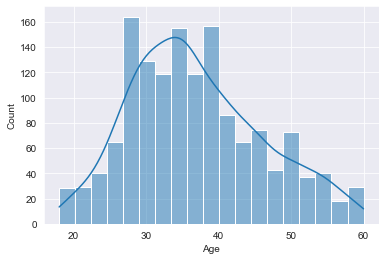

In [50]:
#A graph showing the age distribution of employees
sns.histplot(x="Age", data=HR_Analytics_data, kde=True)

<Axes: xlabel='Gender', ylabel='Count'>

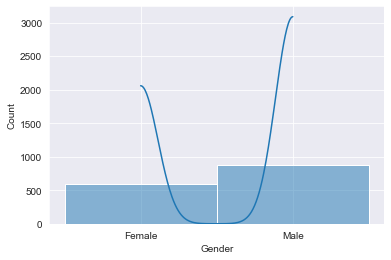

In [51]:
#A graph showing the gender distribution of employees
sns.histplot(x="Gender", data=HR_Analytics_data, kde=True)

<Axes: xlabel='Department', ylabel='Count'>

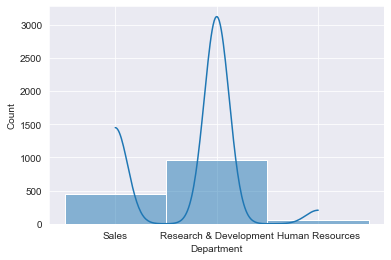

In [52]:
#A graph showing the department distribution of employees
sns.histplot(x="Department", data=HR_Analytics_data, kde=True)

<Axes: xlabel='RelationshipSatisfaction', ylabel='Count'>

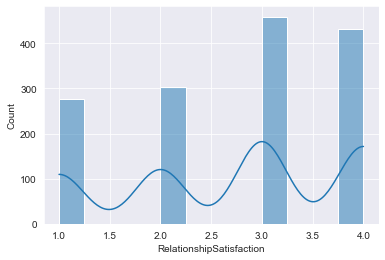

In [53]:
#A graph showing the relationship satisfaction distribution of employees
sns.histplot(x="RelationshipSatisfaction", data=HR_Analytics_data, kde=True)

<Axes: xlabel='HourlyRate', ylabel='Count'>

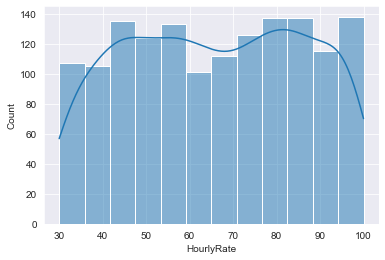

In [54]:
#A graph showing the hourly rate distribution of employees
sns.histplot(x="HourlyRate", data=HR_Analytics_data, kde=True)

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

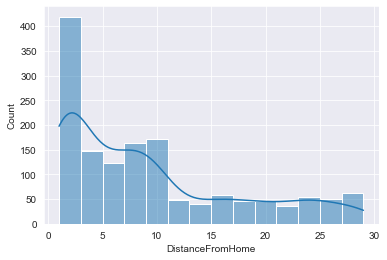

In [55]:
#A graph showing the distance from home distribution of employees
sns.histplot(x="DistanceFromHome", data=HR_Analytics_data, kde=True)

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Count'>

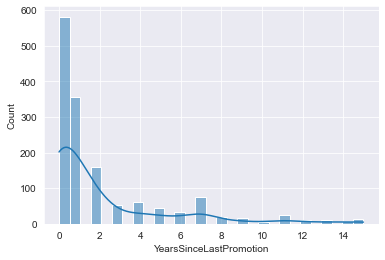

In [56]:
#A graph showing the years since last promotion of employees
sns.histplot(x="YearsSinceLastPromotion", data=HR_Analytics_data, kde=True)

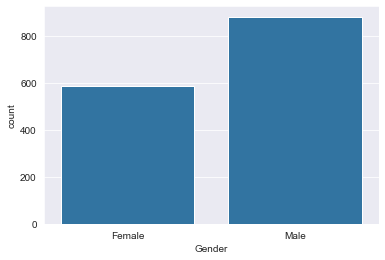

In [60]:
#A graph showing higher number of male to female employees
sns.countplot(x='Gender', data=HR_Analytics_data, color= sns.color_palette()[0]);

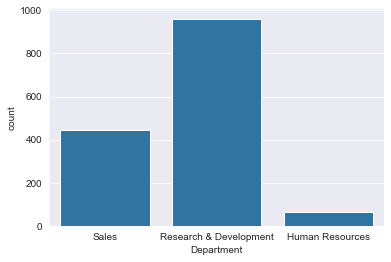

In [61]:
#A graph showing high number of employees in the R&D department 
sns.countplot(x='Department', data=HR_Analytics_data, color= sns.color_palette()[0]);

<Axes: ylabel='Age'>

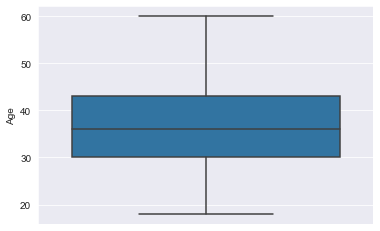

In [62]:
#A graph showing the age spread of the employees
sns.boxplot(y="Age", data=HR_Analytics_data)

<Axes: xlabel='count', ylabel='Department'>

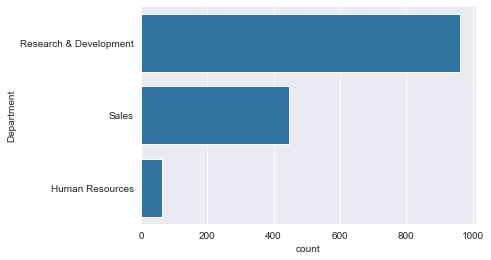

In [64]:
#A graph rotated at 90 degrees showing low number of employees in the HR department 
sns.countplot(y=HR_Analytics_data['Department'], color=sns.color_palette()[0], order=HR_Analytics_data['Department'].value_counts().index)

<Axes: xlabel='count', ylabel='Gender'>

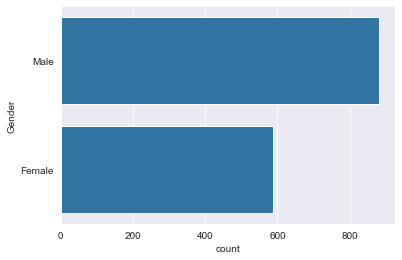

In [65]:
#A graph rotated at 90 degrees showing the gender disparity of employees 
sns.countplot(y=HR_Analytics_data['Gender'], color=sns.color_palette()[0], order=HR_Analytics_data['Gender'].value_counts().index)
# plt.xticks(rotation=90);

<Axes: xlabel='count', ylabel='EducationField'>

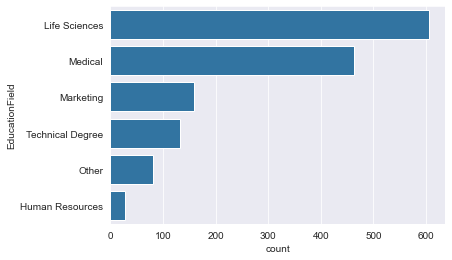

In [66]:
#A graph rotated at 90 degrees showing the spread of employees along their field of study  
sns.countplot(y=HR_Analytics_data['EducationField'], color=sns.color_palette()[0], order=HR_Analytics_data['EducationField'].value_counts().index)

<Axes: xlabel='count', ylabel='Attrition'>

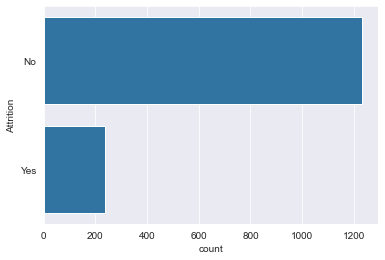

In [67]:
#A graph rotated at 90 degrees showing the attrition inclination of employees
sns.countplot(y=HR_Analytics_data['Attrition'], color=sns.color_palette()[0], order=HR_Analytics_data['Attrition'].value_counts().index)

<Axes: xlabel='count', ylabel='JobRole'>

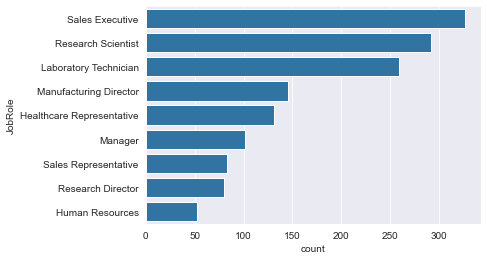

In [68]:
#A graph rotated at 90 degrees showing the job role spread/distribution of employees
sns.countplot(y=HR_Analytics_data['JobRole'], color=sns.color_palette()[0], order=HR_Analytics_data['JobRole'].value_counts().index)

<Axes: xlabel='count', ylabel='OverTime'>

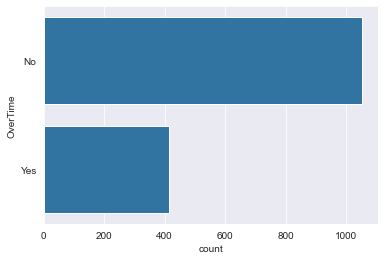

In [73]:
#A graph rotated at 90 degrees showing the number of employees being made to work overtime
sns.countplot(y=HR_Analytics_data['OverTime'], color=sns.color_palette()[0], order=HR_Analytics_data['OverTime'].value_counts().index)

In [1]:
## Bivariate Plot

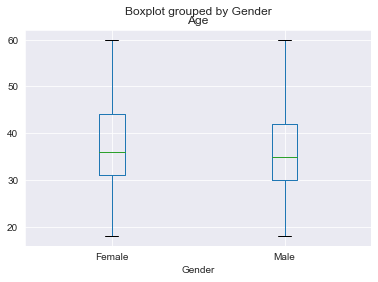

In [23]:
#Comparison between age and gender
HR_Analytics_data.boxplot(column = 'Age', by = 'Gender');
plt.show() 

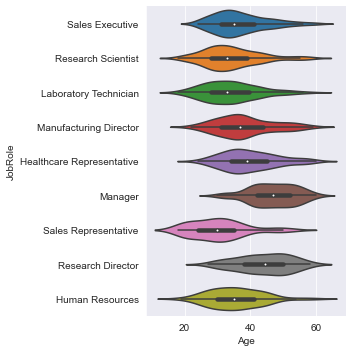

In [40]:
#Plot showing that Sales Representatives are within the age range of 30 years
g = sns.catplot(data = HR_Analytics_data, x = 'Age', y = 'JobRole', 
                kind = 'violin', rotation = 'vertical');
plt.show() 

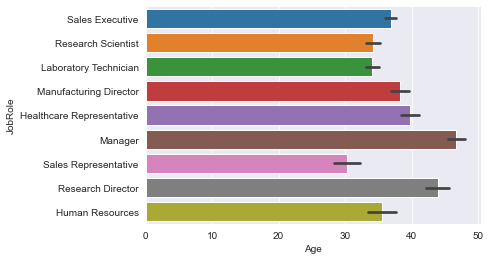

In [46]:
#Plot showing that the position of managers are filled with individuals above 45 years
sns.barplot(data = HR_Analytics_data, x = 'Age', y = 'JobRole');
plt.show() 

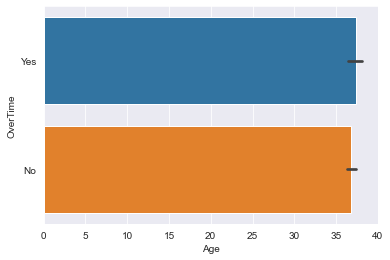

In [3]:
#Plot showing that employees willing to do overtime are slightly above 37 years old
sns.barplot(data = HR_Analytics_data, x = 'Age', y = 'OverTime');
plt.show() 


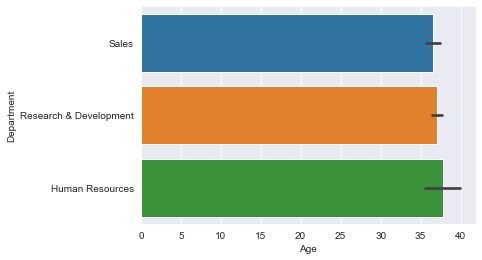

In [25]:
sns.barplot(data = HR_Analytics_data, x = 'Age', y = 'Department');
plt.show() 

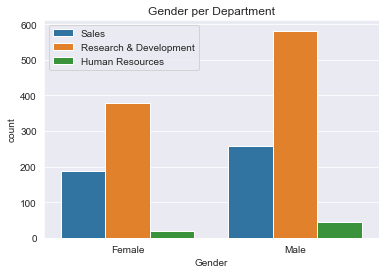

In [7]:
#Graph showing that there are more males in all the departments compared to females
sns.countplot(data=HR_Analytics_data, x = 'Gender' , hue = 'Department')
plt.title('Gender per Department')
plt.legend(loc="upper left");

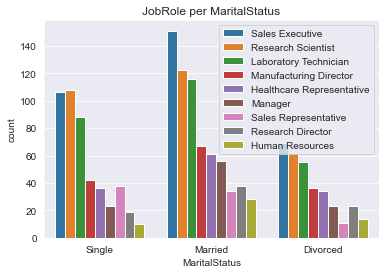

In [11]:
#Graph showing that married employees have more job roless than the singles and divorced employees 
sns.countplot(data=HR_Analytics_data, x = 'MaritalStatus' , hue = 'JobRole')
plt.title('JobRole per MaritalStatus')
plt.legend(loc="upper right");

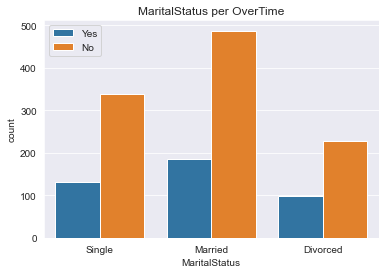

In [13]:
#Graph showing that single employees are more willing to take up overtime than divorced employees
sns.countplot(data=HR_Analytics_data, x = 'MaritalStatus' , hue = 'OverTime')
plt.title('MaritalStatus per OverTime')
plt.legend(loc="upper left");

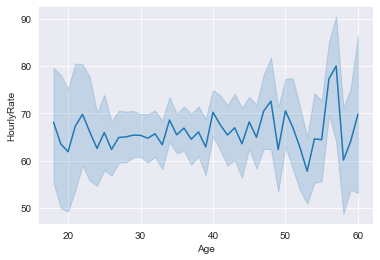

In [27]:
#Graph showing that younger adults get less pay than their elderly counterpart
sns.lineplot(data = HR_Analytics_data, x = 'Age', y = 'HourlyRate');
plt.show() 

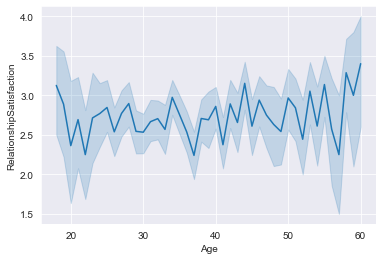

In [28]:
#Graph showing that employees within the age bracket of 40 to 60 years old have more satisfying relationship
sns.lineplot(data = HR_Analytics_data, x = 'Age', y = 'RelationshipSatisfaction');
plt.show() 

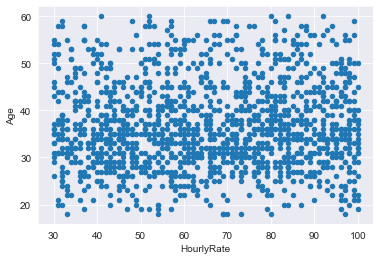

In [21]:
#Plot showing that employees within the age range of 30 and 40 years had more work input
HR_Analytics_data.plot(x = 'HourlyRate', y = 'Age', kind = 'scatter');
plt.show() 

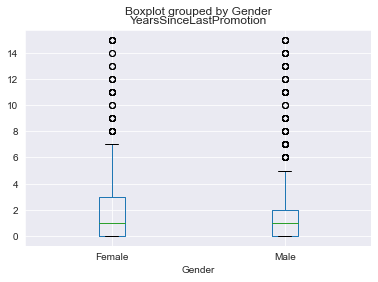

In [30]:
#Graph showing how the male and female employees where promoted over the years
HR_Analytics_data.boxplot(column = 'YearsSinceLastPromotion', by = 'Gender');
plt.show() 